<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem12_Practica25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem12_Practica25.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_text

In [2]:
ruta = '/content/drive/MyDrive/MIAAD/PADP/housing.csv'
df = pd.read_csv(ruta)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


De lo anterior, se observa que tenemos un total de 506 observaciones, sin valores nulos, donde todas las variables son numéricas

In [4]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Confirmamos que no existen registros duplicados

# Análisis de Datos

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


En algunos casos se observan que las escalas difieren significativamente, pero al tratarde de un árbol de decisión, esto no afecta al rendimiento del modelo como lo haría en otros modelos

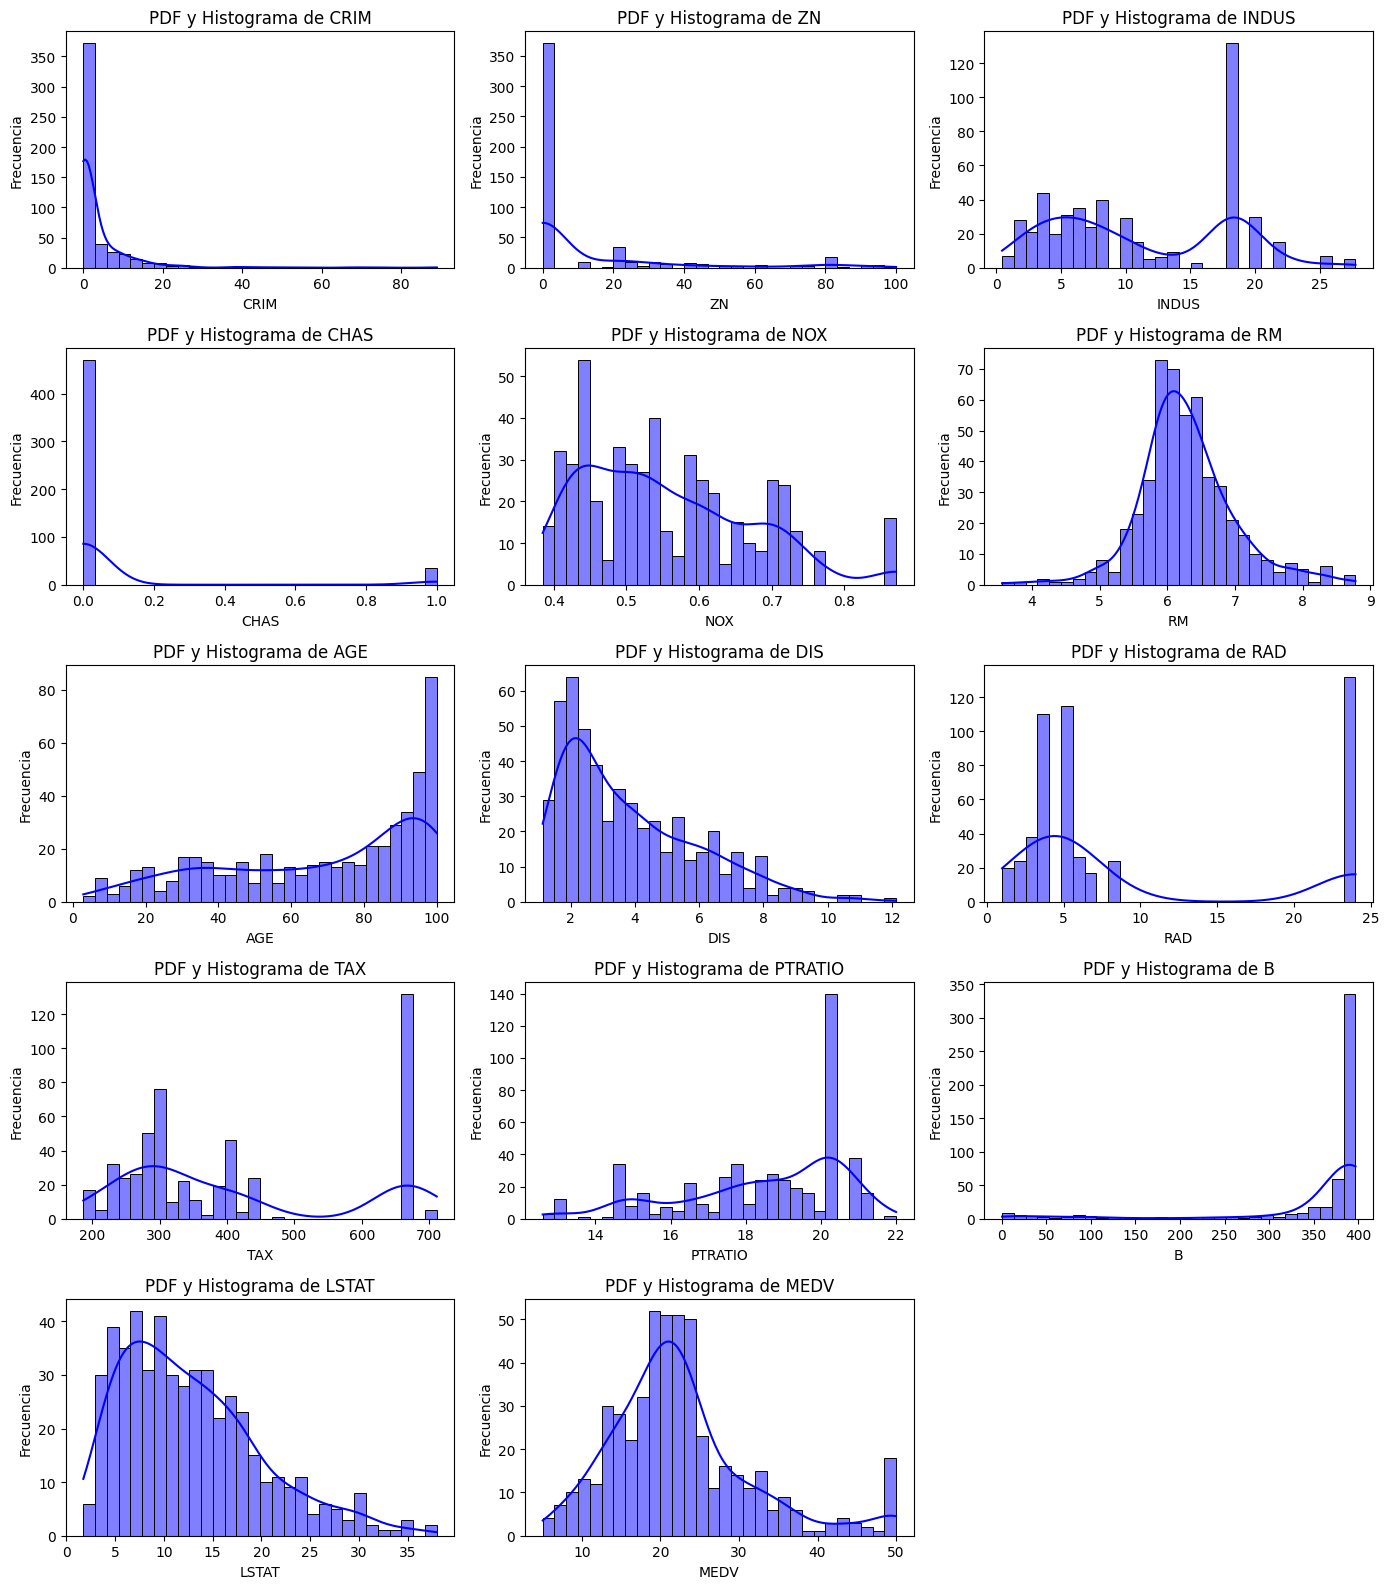

In [6]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(14, 4*4))
for i, col in enumerate(df.columns.tolist(), 1):
    plt.subplot(5, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

Observamos las distribuciones de todas las variables, incluida la target, donde solo la variable RM parece distribuirse como una normal, sin embargo, para este modelo no es relevante, ya que maneja de buena manera toda clase de distribuciones ya que se basa en otro concepto para generar los umbrales en cada nodo

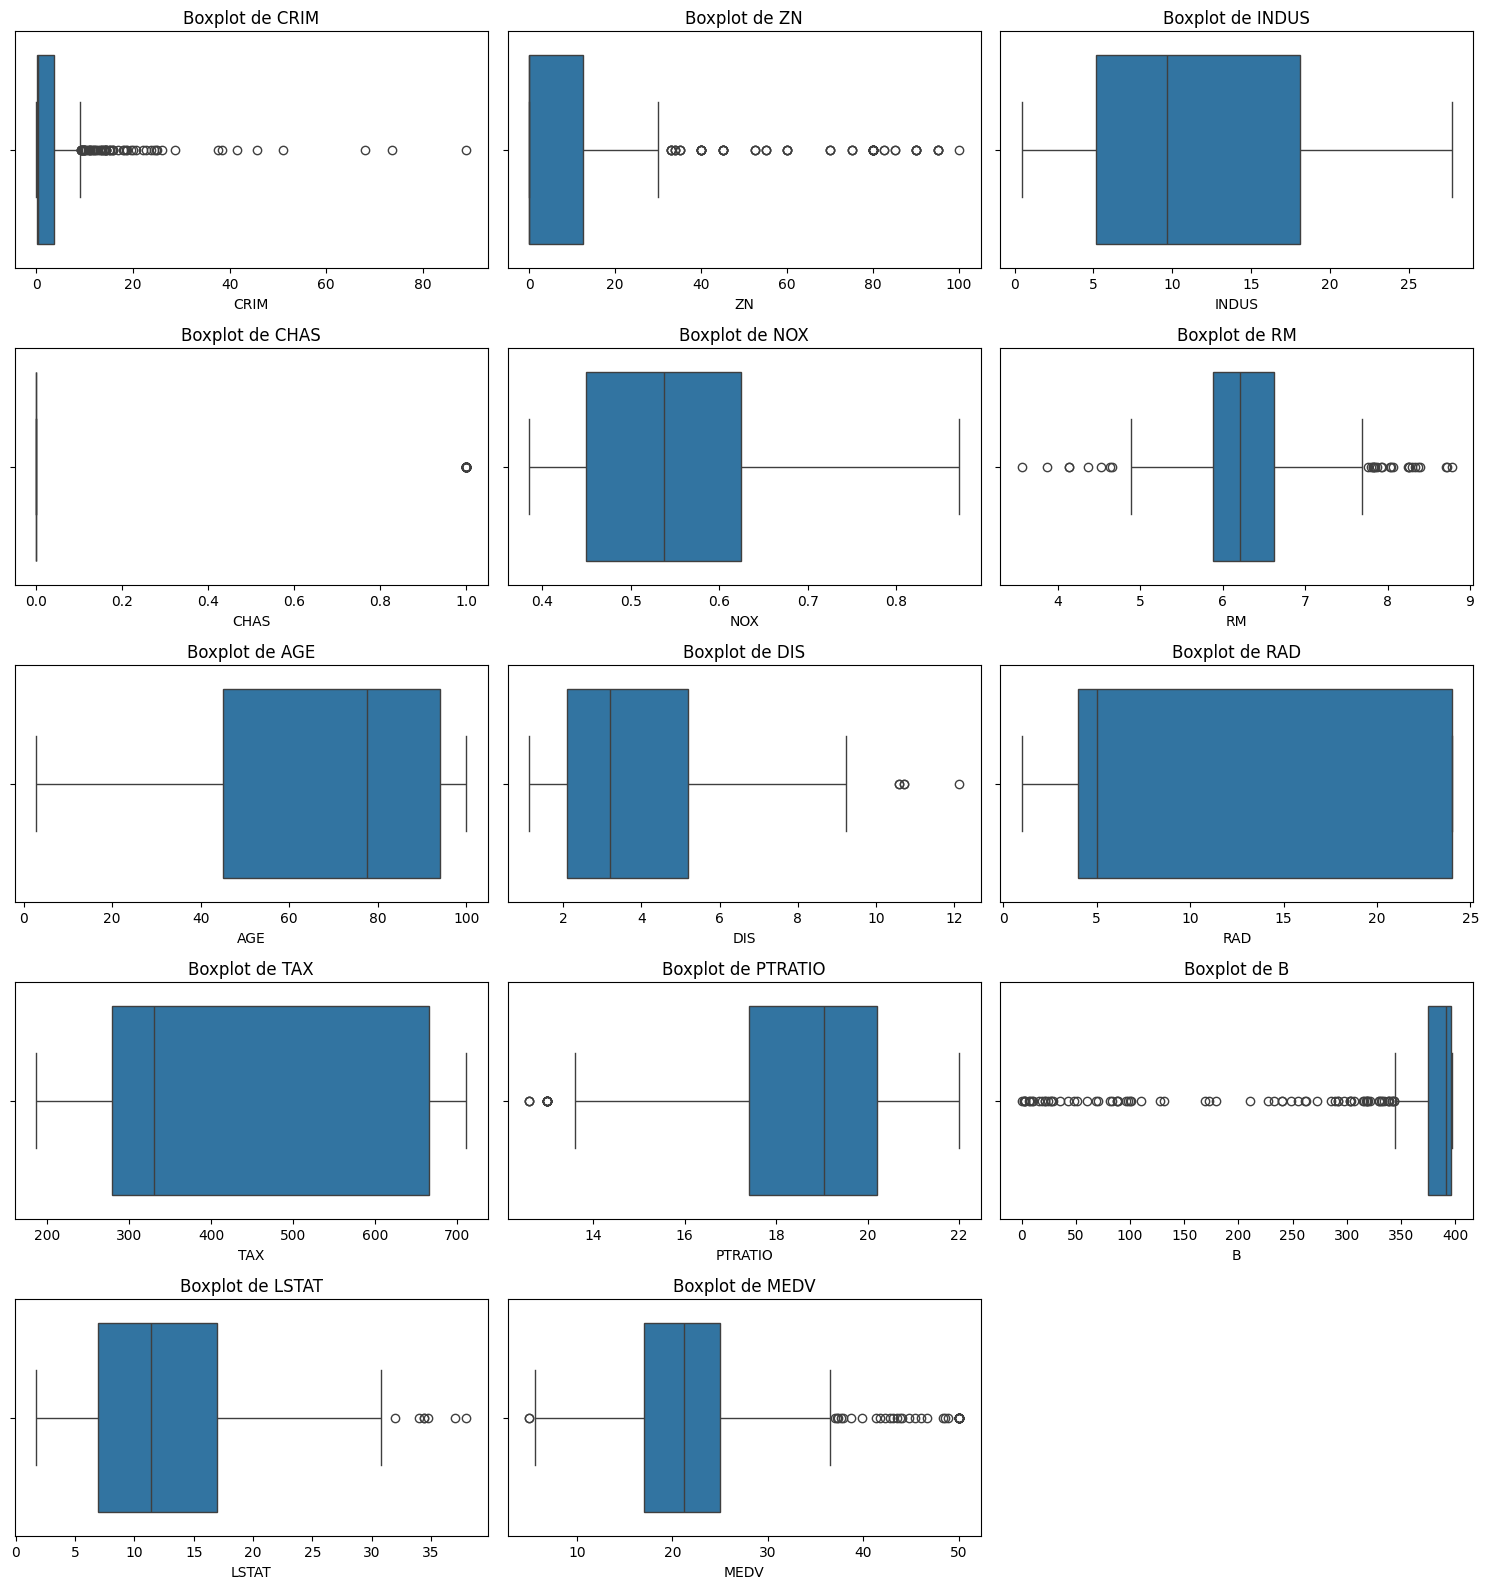

In [7]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 4*4))
# Crear boxplots para cada columna numérica
for i, col in enumerate(df.columns.tolist(), 1):
    plt.subplot(5, 3, i)  # n filas, 3 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Para el caso de los valores atípicos se observa que aparecen en todas las variables, pero esta es otra de las ventajas de este modelo, que no es sensible a los outliers, por lo tanto, podemos dejarlos sin ningún tratamiento y se espera que esto no tenga un impacto negativo en el rendimiento del modelo

In [8]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
corr_matrix

Matriz de correlación:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


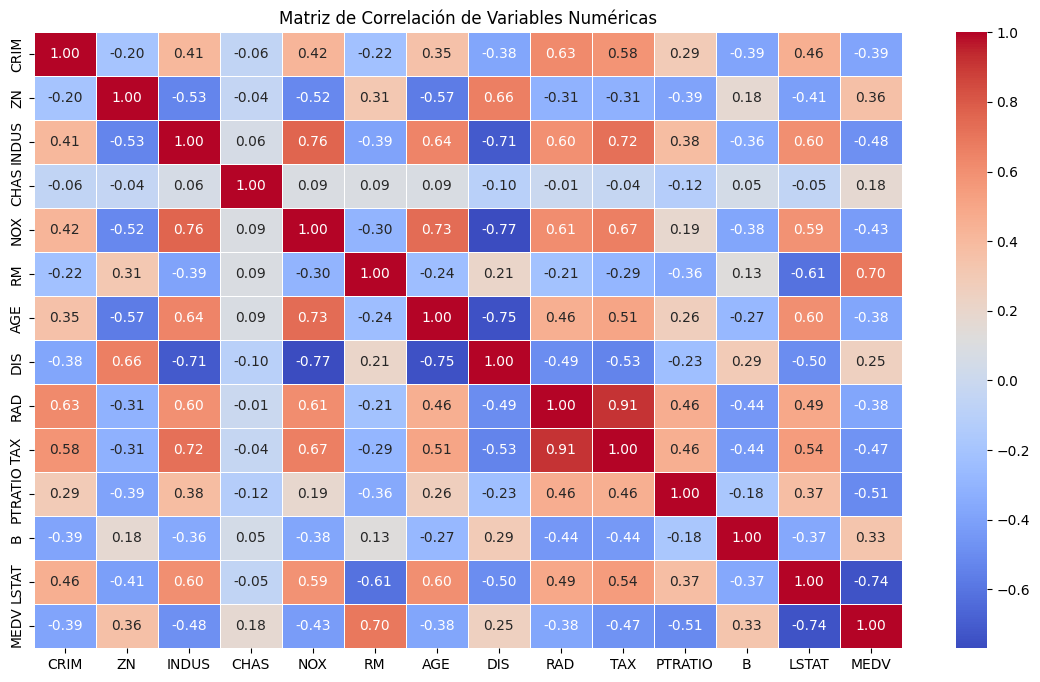

In [9]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Existen múltiples correlaciones significativas entre variables, pero dado que los árboles de decisión no asumen independencia entre las variables, no debería generar mayor problema

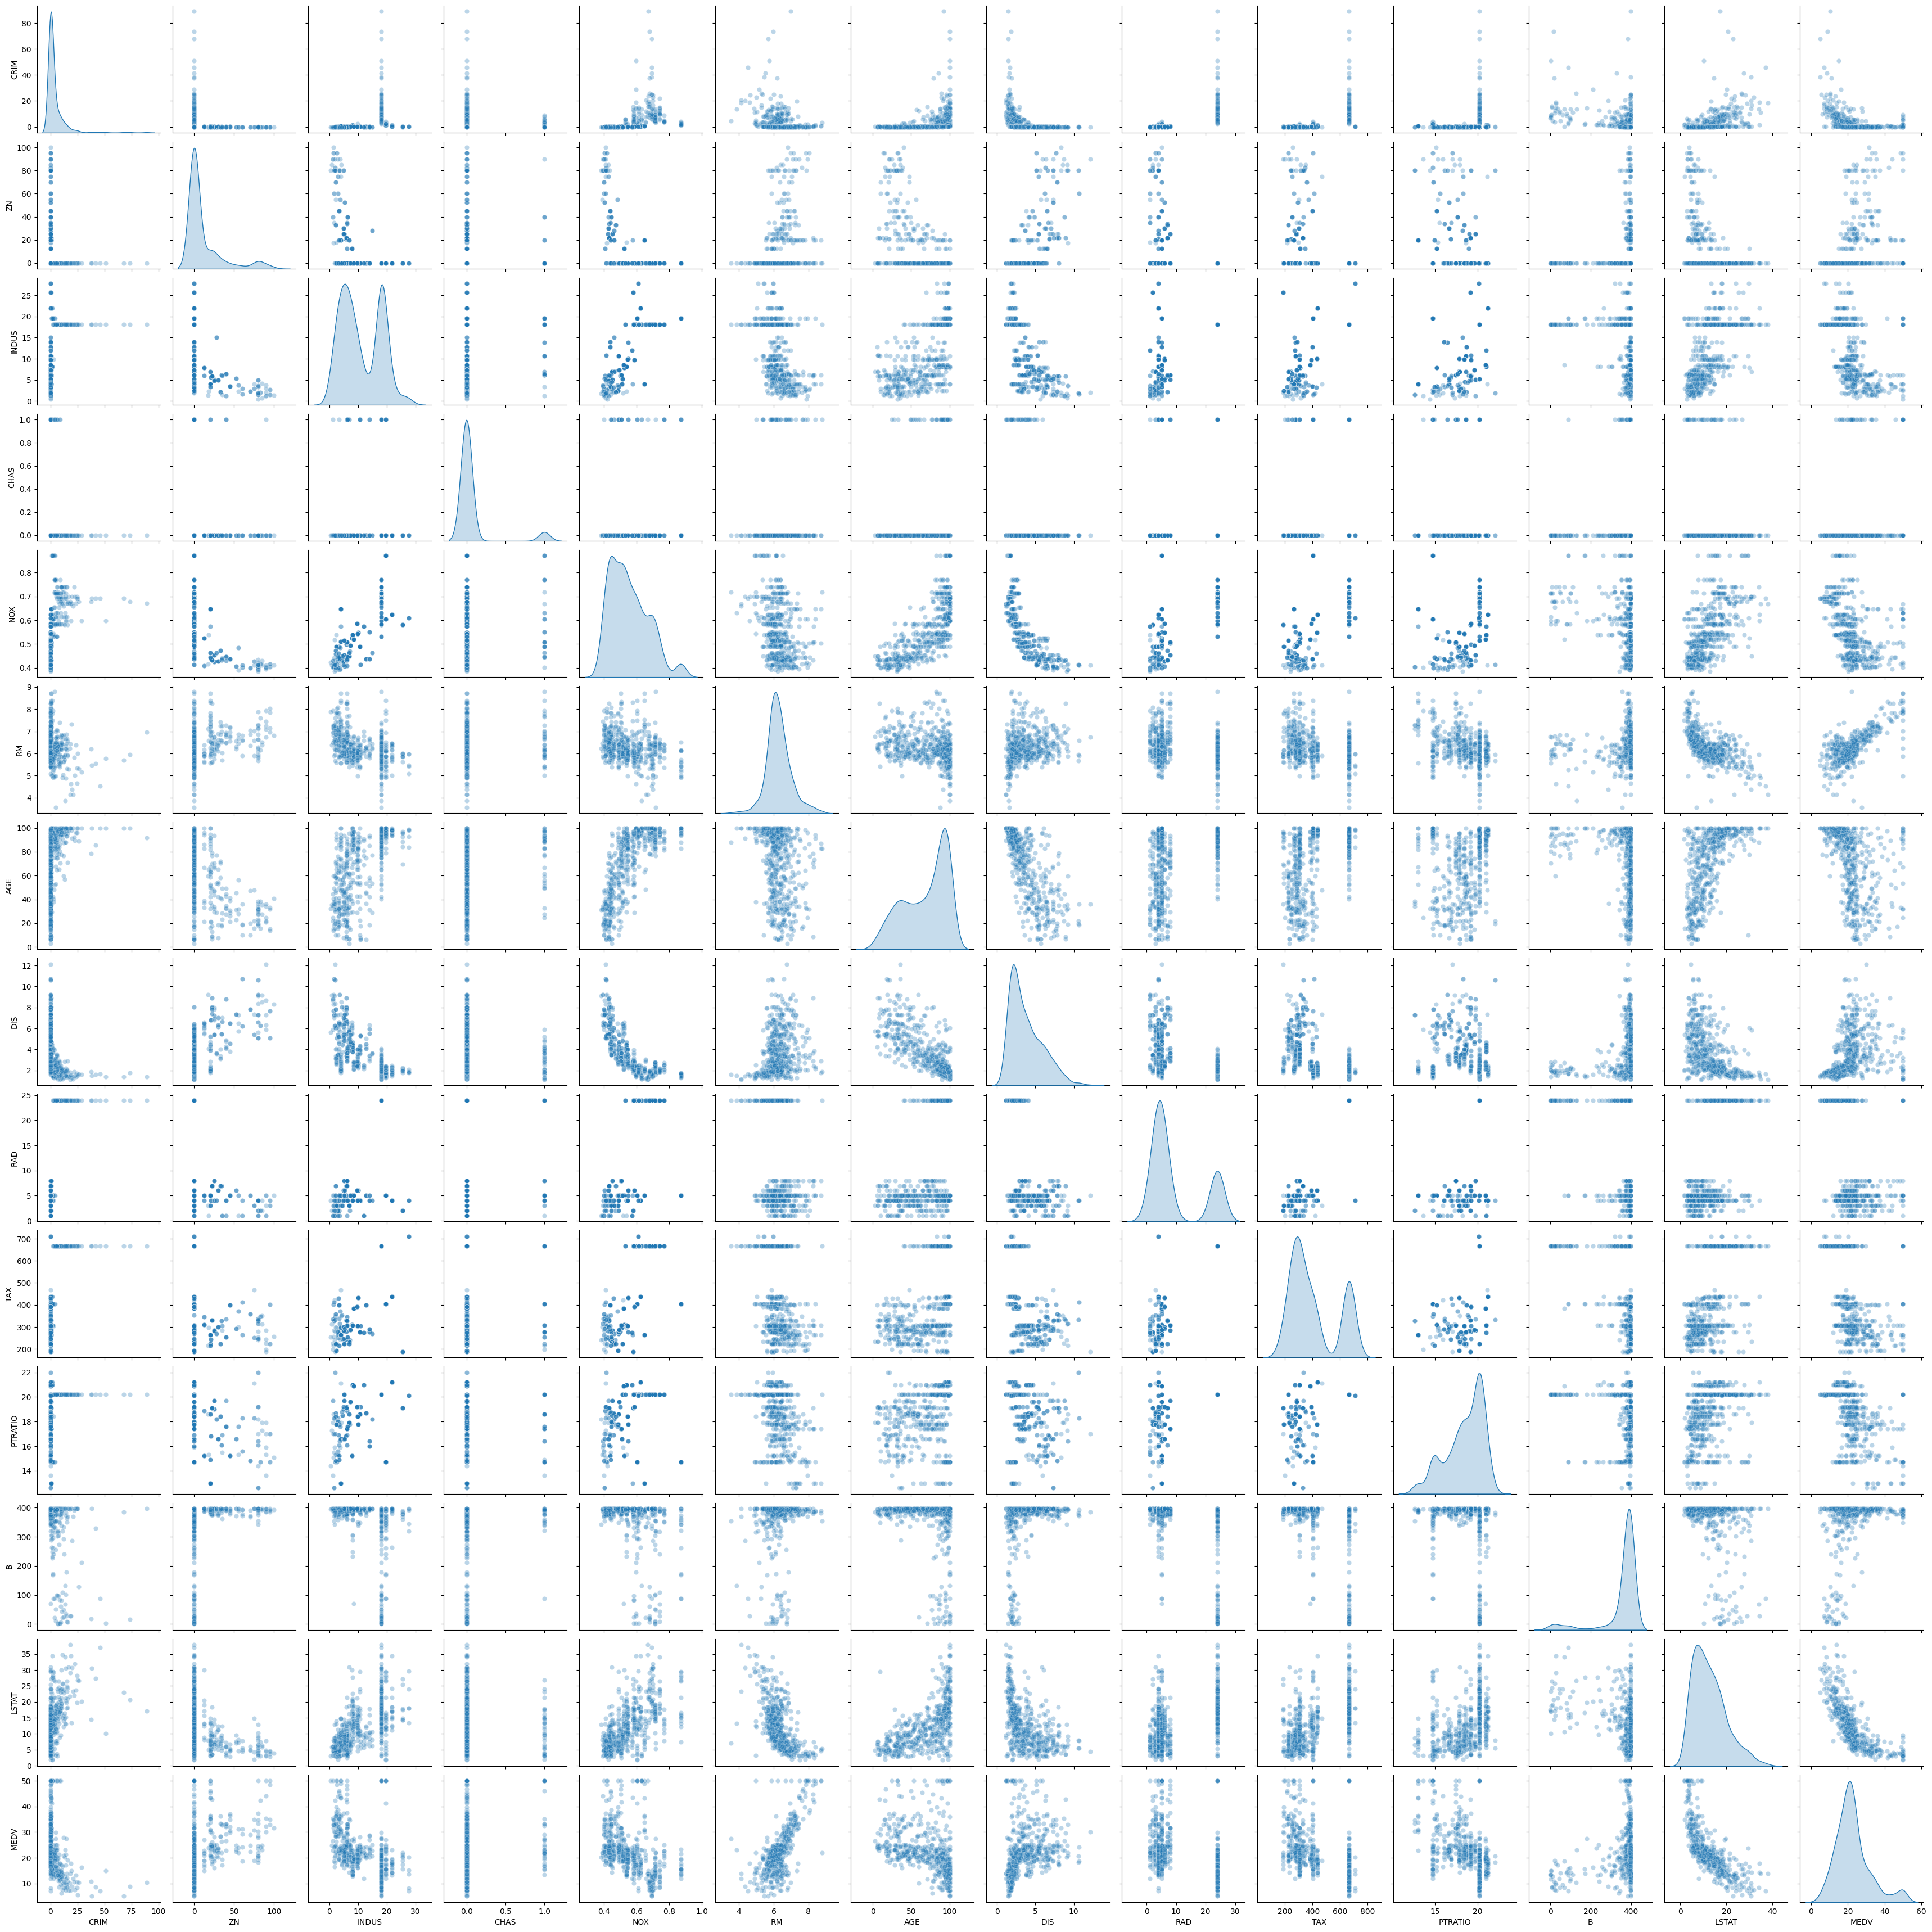

In [10]:
# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

Ahora vemos las gráficas de dispersión entre todas las variables donde se aprecia de forma gráfica las relaciones que se veían en la matriz de correlación

# División de Conjuntos

In [11]:
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenamiento

In [12]:
# Crear el modelo
reg = DecisionTreeRegressor(
    criterion='squared_error',  # 'absolute_error'
    max_depth=6,
    random_state=42
)

# Entrenar el modelo
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [13]:
y_pred = reg.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # raíz del error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

MAE: 2.686
MSE: 16.922
RMSE: 4.114
R²: 0.758


Para este primer modelo se consideran buenos los resultados, ya que el tenemos un MAE (Mean Absolute Error) y un RMSE (Root Mean Squared Error) de 2.68 y 4.11 respectivamente, ambos valores se encuentran en las mimas unidades que la variable objetivo y están por debajo de la desviación estándar de los datos, además de que se tiene un $R^2$ de 0.75, es decir, el modelo explica el 75% de variabilidad.

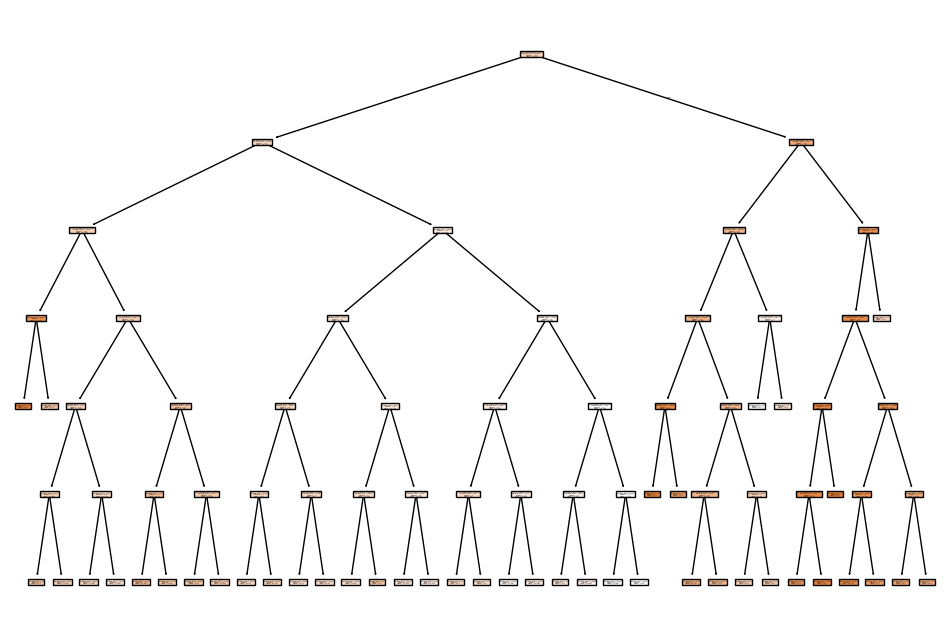

In [15]:
plt.figure(figsize=(12,8))
plot_tree(reg, filled=True, feature_names=load_breast_cancer().feature_names, class_names=load_breast_cancer().target_names)
plt.show()

In [16]:
rules = export_text(reg, feature_names=df.drop(columns='MEDV').columns.tolist())
print(rules)

|--- RM <= 6.94
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- CRIM <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- CRIM >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- DIS >  1.38
|   |   |   |--- RM <= 6.54
|   |   |   |   |--- LSTAT <= 7.76
|   |   |   |   |   |--- CRIM <= 0.03
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- CRIM >  0.03
|   |   |   |   |   |   |--- value: [23.49]
|   |   |   |   |--- LSTAT >  7.76
|   |   |   |   |   |--- PTRATIO <= 20.95
|   |   |   |   |   |   |--- value: [21.29]
|   |   |   |   |   |--- PTRATIO >  20.95
|   |   |   |   |   |   |--- value: [17.89]
|   |   |   |--- RM >  6.54
|   |   |   |   |--- LSTAT <= 5.78
|   |   |   |   |   |--- PTRATIO <= 17.85
|   |   |   |   |   |   |--- value: [31.29]
|   |   |   |   |   |--- PTRATIO >  17.85
|   |   |   |   |   |   |--- value: [26.32]
|   |   |   |   |--- LSTAT >  5.78
|   |   |   |   |   |--- DIS <= 3.97
|   |   |   |   |   |   |--- value:

# Optimización

In [18]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=42)

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
for d in depths:
    reg_cv = DecisionTreeRegressor(criterion='squared_error',max_depth=d, random_state=42)

    results = cross_validate(reg_cv, X, y, cv=kf, scoring=scoring)
    print(f"Profundidad: {d}")
    print("Resultados promedio:")
    print(f"MAE: {-results['test_neg_mean_absolute_error'].mean():.4f}")
    print(f"MSE: {-results['test_neg_mean_squared_error'].mean():.4f}")
    print(f"R²: {results['test_r2'].mean():.4f} \n")


Profundidad: 1
Resultados promedio:
MAE: 5.2465
MSE: 50.7614
R²: 0.3901 

Profundidad: 2
Resultados promedio:
MAE: 3.8043
MSE: 28.9612
R²: 0.6492 

Profundidad: 3
Resultados promedio:
MAE: 3.3908
MSE: 23.5532
R²: 0.7129 

Profundidad: 4
Resultados promedio:
MAE: 2.9915
MSE: 18.9347
R²: 0.7707 

Profundidad: 5
Resultados promedio:
MAE: 2.7750
MSE: 17.0693
R²: 0.8018 

Profundidad: 6
Resultados promedio:
MAE: 2.8369
MSE: 17.2997
R²: 0.7966 

Profundidad: 7
Resultados promedio:
MAE: 2.8012
MSE: 17.7581
R²: 0.7928 

Profundidad: 8
Resultados promedio:
MAE: 2.9497
MSE: 21.6332
R²: 0.7393 

Profundidad: 9
Resultados promedio:
MAE: 2.8703
MSE: 18.3336
R²: 0.7850 

Profundidad: 10
Resultados promedio:
MAE: 3.0082
MSE: 20.9467
R²: 0.7489 



# Evaluación

Se observa que el punto donde se optimizan las métricas de rendimiento es con una profundidad de 5, pues es donde el error se minimiza y donde el $R^2$ se maximiza, esto al aplicar kfold para estratificar la muestra y usando múltiples valores de manera iterativa para la profundidad del árbol